# Programando un Autoencoder Convolucional


<center><img src="https://www.researchgate.net/profile/Xifeng_Guo/publication/320658590/figure/fig1/AS:614154637418504@15234372844108/The-structure-of-proposed-Convolutional-AutoEncoders-CAE-for-MNIST-In-the-middle-there.png" alt="Drawing" width="600px"/></center>


In [ ]:
import numpy as np
import scipy as sc
import sklearn as sk
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils      import to_categorical

In [ ]:
# Load the MNIST dataset.
mnist = np.genfromtxt('./sample_data/mnist_train_small.csv', delimiter=',')

# Separate the labels from the images
X = mnist[:, 1:]
Y = mnist[:, 0:1]

# # Scale the data and One-Hot Encode the output.
Xn = X / 255
Yn = to_categorical(Y)

# Use Sklearn's data splitter for train/test
from sklearn.model_selection import train_test_split

# Train/test split partition to supervise overfitting.
X_train, X_test, Y_train, Y_test = train_test_split(Xn, Yn, test_size=0.3)

In [ ]:
X_train[0].shape

(784,)

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.optimizers import *

size = 28 # Image size.

z = 10 # Size of the autoencoder's intermediate vector.

# First we create the input for the encoder.
inpE = Input(shape=(size, size, 1))  

# Convolutional layers.
encode_1 = Conv2D(filters=32, kernel_size=3, padding="same", strides=2, activation='relu')(inpE)
print("Conv1", encode_1.shape)       
encode_2 = Conv2D(filters=64, kernel_size=3, padding="same", strides=2, activation='relu')(encode_1)  
print("Conv2", encode_2.shape)                            
encode_3 = Conv2D(filters=128, kernel_size=3, strides=2, activation='relu')(encode_2)   
print("Conv3", encode_3.shape)                              
encode_4 = Flatten()(encode_3) 
print("Flatten", encode_4.shape)

Conv1 (None, 14, 14, 32)
Conv2 (None, 7, 7, 64)
Conv3 (None, 3, 3, 128)
Flatten (None, 1152)


In [ ]:
# The last layer of the encoder gives us the latent vector.
c = Dense(z, activation="tanh")(encode_4) 

# Create the input for the decoder
inpD = Input(shape=(z))

# Reshape
FC = Dense(1152, activation="relu")(inpD)
decode = Reshape(target_shape=(3, 3, 128))(FC)

# Reverse the encoder steps.
decode_1 = Conv2DTranspose(filters=64, kernel_size=3,strides=2, activation='relu')(decode)
print("DeConv3", decode_1.shape)
decode_2 = Conv2DTranspose(filters=32, kernel_size=3, padding="same", strides=2, activation='relu')(decode_1)
print("DeConv2", decode_2.shape)
decode_3 = Conv2DTranspose(filters=1, kernel_size=3, padding="same", strides=2, activation='relu')(decode_2)
print("DeConv1", decode_3.shape)

DeConv3 (None, 7, 7, 64)
DeConv2 (None, 14, 14, 32)
DeConv1 (None, 28, 28, 1)


In [ ]:
# Create the encoder and decoder models
encoder = Model(inputs=inpE, outputs=c)
decoder = Model(inputs=inpD, outputs=decode_3)

# Create the Autoencoder
autoencoder = Sequential()
autoencoder.add(encoder)
autoencoder.add(decoder)

# Compile and optimize.
autoencoder.compile(optimizer=Adam(), loss='mse')

In [ ]:
autoencoder.fit(X_train.reshape(-1, size, size, 1), X_train.reshape(-1, size, size, 1), epochs=30, batch_size=128)

Epoch 1/30
110/110 [==============================] - 6s 8ms/step - loss: 0.0646
Epoch 2/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0326
Epoch 3/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0243
Epoch 4/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0209
Epoch 5/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0193
Epoch 6/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0182
Epoch 7/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0174
Epoch 8/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0167
Epoch 9/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0162
Epoch 10/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0158
Epoch 11/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0154
Epoch 12/30
110/110 [==============================] - 1s 7ms/step - loss: 0.0151
Epoch 13/30
110/110 [====

1/1 [==============================] - 0s 75ms/step


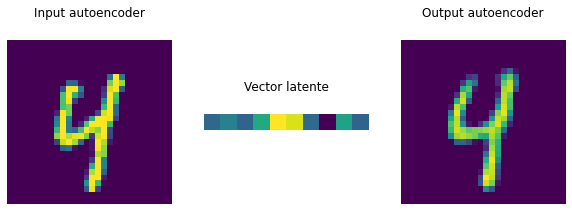

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 10))

inpImg = X_test[np.random.randint(1, 100)].reshape(1, 28, 28, 1)

# Input of the autoencoder.
fig.axes[0].matshow(inpImg[0, :, :, 0])
fig.axes[0].set_title("Input autoencoder")
fig.axes[0].axis("off")

# We call the autoencoder.
outImg = autoencoder.predict(inpImg)

# Get the latent vector.
zVec = encoder.predict(inpImg)

fig.axes[1].matshow(zVec)
fig.axes[1].set_title("Latent vector")
fig.axes[1].axis("off")

#Output of the autoencoder.
fig.axes[2].matshow(outImg[0, :, :, 0])
fig.axes[2].set_title("Output autoencoder")
fig.axes[2].axis("off")

plt.show()